In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelBinarizer, StandardScaler
from sklearn.linear_model import LinearRegression, HuberRegressor, Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn_pandas import DataFrameMapper
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.utils import to_categorical

pd.set_option("max.columns", None)

In [2]:
df = pd.read_csv("data/student-mat.csv")

In [3]:
df["finalgrade"] = (df["G1"] + df["G2"] + df["G3"]) / 3

In [4]:
target = "finalgrade"
X = df.drop(target, axis=1)
y = df[target]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [6]:
df.head(1)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,finalgrade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6,5.666667


In [7]:
mapper = DataFrameMapper([
    ("school", LabelBinarizer()),
    ("sex", LabelBinarizer()),
    (["age"], StandardScaler()),
    ("address", LabelBinarizer()),
    ("famsize", LabelBinarizer()),
    ("Pstatus", LabelBinarizer()),
    (["Medu"], StandardScaler()),
    ("Mjob", LabelBinarizer()),
    ("Fjob", LabelBinarizer()),
    ("reason", LabelBinarizer()),
    ("guardian", LabelBinarizer()),
    (["traveltime"], StandardScaler()),
    (["studytime"], StandardScaler()),
    (["failures"], StandardScaler()),
    ("schoolsup", LabelBinarizer()),
    ("famsup", LabelBinarizer()),
    ("paid", LabelBinarizer()),
    ("activities", LabelBinarizer()),
    ("nursery", LabelBinarizer()),
    ("higher", LabelBinarizer()),
    ("internet", LabelBinarizer()),
    ("romantic", LabelBinarizer()),
    (["famrel"], StandardScaler()),
    (["freetime"], StandardScaler()),
    (["goout"], StandardScaler()),
    (["Dalc"], StandardScaler()),
    (["Walc"], StandardScaler()),
    (["health"], StandardScaler()),
    (["absences"], StandardScaler()),
],df_out=True)

In [8]:
Z_train = mapper.fit_transform(X_train)
Z_test = mapper.transform(X_test)

In [9]:
model = LinearRegression().fit(Z_train,y_train)
print("LinearRegression train score is " + str(model.score(Z_train,y_train)))
print("LinearRegression test score is " + str(model.score(Z_test,y_test)))

print("Mean squared error is " + str(mean_squared_error(y_test, model.predict(Z_test))**(1/2)))

LinearRegression train score is 0.330347300401697
LinearRegression test score is 0.15530639872111773
Mean squared error is 3.3075558945348815


In [10]:
model = HuberRegressor().fit(Z_train,y_train)
print("HuberRegressor train score is " + str(model.score(Z_train,y_train)))
print("HuberRegressor test score is " + str(model.score(Z_test,y_test)))

print("Mean squared error is " + str(mean_squared_error(y_test, model.predict(Z_test))**(1/2)))

HuberRegressor train score is 0.3065482159980253
HuberRegressor test score is 0.1165706193011782
Mean squared error is 3.3825444259904676


In [11]:
model = Lasso().fit(Z_train,y_train)
print("Lasso train score is " + str(model.score(Z_train,y_train)))
print("Lasso test score is " + str(model.score(Z_test,y_test)))

print("Mean squared error is " + str(mean_squared_error(y_test, model.predict(Z_test))**(1/2)))

Lasso train score is 0.0641859280343654
Lasso test score is 0.0740472016129945
Mean squared error is 3.462996193588234


In [12]:
model = Ridge().fit(Z_train,y_train)
print("Ridge train score is " + str(model.score(Z_train,y_train)))
print("Ridge test score is " + str(model.score(Z_test,y_test)))

print("Mean squared error is " + str(mean_squared_error(y_test, model.predict(Z_test))**(1/2)))

Ridge train score is 0.33016634842419745
Ridge test score is 0.16463462773686977
Mean squared error is 3.2892419791965155


In [13]:
model = ElasticNet().fit(Z_train,y_train)
print("ElasticNet train score is " + str(model.score(Z_train,y_train)))
print("ElasticNet test score is " + str(model.score(Z_test,y_test)))

print("Mean squared error is " + str(mean_squared_error(y_test, model.predict(Z_test))**(1/2)))

ElasticNet train score is 0.09629320188221413
ElasticNet test score is 0.11743427855605282
Mean squared error is 3.3808905981866557


In [14]:
model = RandomForestRegressor().fit(Z_train,y_train)
print("RandomForestRegressor train score is " + str(model.score(Z_train,y_train)))
print("RandomForestRegressor test score is " + str(model.score(Z_test,y_test)))

print("Mean squared error is " + str(mean_squared_error(y_test, model.predict(Z_test))**(1/2)))

RandomForestRegressor train score is 0.8497229144522871
RandomForestRegressor test score is 0.07606435777897214
Mean squared error is 3.459222128294799


/Users/BA/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [15]:
model = DecisionTreeRegressor().fit(Z_train,y_train)
print("DecisionTreeRegressor train score is " + str(model.score(Z_train,y_train)))
print("DecisionTreeRegressor test score is " + str(model.score(Z_test,y_test)))

print("Mean squared error is " + str(mean_squared_error(y_test, model.predict(Z_test))**(1/2)))

DecisionTreeRegressor train score is 1.0
DecisionTreeRegressor test score is -0.7309873899928747
Mean squared error is 4.734831649801721


In [16]:
model = AdaBoostRegressor().fit(Z_train,y_train)
print("AdaBoostRegressor train score is " + str(model.score(Z_train,y_train)))
print("AdaBoostRegressor test score is " + str(model.score(Z_test,y_test)))

print("Mean squared error is " + str(mean_squared_error(y_test, model.predict(Z_test))**(1/2)))

AdaBoostRegressor train score is 0.5068914165765006
AdaBoostRegressor test score is 0.22393983783562255
Mean squared error is 3.170335947116801


In [17]:
model = Sequential([
    Input(shape=(Z_train.shape[1],)),
    Dense(128, activation='relu'),
    Dropout(.05),
    Dense(64, activation='softmax'),
    Dropout(.05),
    Dense(32, activation='relu'),
    Dropout(.05),
    Dense(16, activation='softmax'),
    Dropout(.05),
    Dense(8, activation='exponential'),
    Dropout(.05),
    Dense(1, activation='selu')
])

model.compile(loss='mae', optimizer='adam')

history = model.fit(Z_train, y_train,
                    validation_data=(Z_test, y_test),
                    epochs=50, batch_size=16,
                    verbose=2)

Train on 296 samples, validate on 99 samples
Epoch 1/50
296/296 - 1s - loss: 12.1941 - val_loss: 11.7774
Epoch 2/50
296/296 - 0s - loss: 12.0593 - val_loss: 11.6144
Epoch 3/50
296/296 - 0s - loss: 11.8116 - val_loss: 11.3190
Epoch 4/50
296/296 - 0s - loss: 11.4117 - val_loss: 10.7588
Epoch 5/50
296/296 - 0s - loss: 10.7907 - val_loss: 10.0736
Epoch 6/50
296/296 - 0s - loss: 10.1853 - val_loss: 9.5672
Epoch 7/50
296/296 - 0s - loss: 9.6854 - val_loss: 9.0640
Epoch 8/50
296/296 - 0s - loss: 9.2078 - val_loss: 8.5077
Epoch 9/50
296/296 - 0s - loss: 8.6560 - val_loss: 7.9004
Epoch 10/50
296/296 - 0s - loss: 8.0317 - val_loss: 7.2779
Epoch 11/50
296/296 - 0s - loss: 7.4452 - val_loss: 6.6457
Epoch 12/50
296/296 - 0s - loss: 6.7545 - val_loss: 6.0384
Epoch 13/50
296/296 - 0s - loss: 6.1378 - val_loss: 5.4247
Epoch 14/50
296/296 - 0s - loss: 5.5858 - val_loss: 4.8477
Epoch 15/50
296/296 - 0s - loss: 5.1490 - val_loss: 4.2965
Epoch 16/50
296/296 - 0s - loss: 4.4323 - val_loss: 3.8217
Epoch 17/

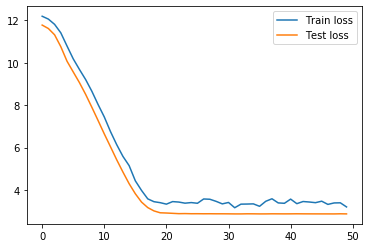

In [18]:
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test loss')
plt.legend();